In [7]:
import cptac
import cptac.utils as ut
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics

In [8]:
def get_gene_list(tissue):
    #Returns a list of the genes that are in both proteomics and transcriptomics
    gene_list = []
    prot = tissue.get_proteomics()
    if isinstance(prot.columns, pd.MultiIndex):
        prot = prot.columns.get_level_values(0)
    trans = tissue.get_transcriptomics()
    if isinstance(trans.columns, pd.MultiIndex):
        trans = trans.columns.get_level_values(0)
    for i in prot:
        if i in trans and i not in gene_list:
            gene_list.append(i)
    return gene_list

In [9]:
def correlation_list(tissue, gene_list, valid_sample_number = 30, tissue_type = "both"):
    #Returns a list of lists containing the name of the gene and the correlation
    corr_list = []
    pval_list = []
    prot = tissue.get_proteomics(tissue_type)
    if isinstance(prot.columns, pd.MultiIndex):
        prot = ut.reduce_multiindex(df = prot, levels_to_drop="Database_ID")
    
    trans = tissue.get_transcriptomics(tissue_type)
    if isinstance(trans.columns, pd.MultiIndex):
        trans = ut.reduce_multiindex(df = trans, levels_to_drop="Database_ID")
        
    prot_index_values = list(prot.index.values)
    trans_index_values = list(trans.index.values)
    

    for found_index in prot_index_values:
        if found_index not in trans_index_values:
            prot = prot.drop(index=found_index)
    for found_index in trans_index_values:
        if found_index not in prot_index_values:
            trans = trans.drop(index=found_index)
        
    for gene in gene_list:
        if gene not in prot:
            continue
        prot_measurements = prot[gene]
        prot_count = len(prot_measurements.dropna())
        
        trans_measurements = trans[gene]
        trans_count = len(trans_measurements.dropna())
        
        if prot_count < valid_sample_number or trans_count < valid_sample_number:
            continue
            
        nan_indices = set()
        prot_indices = list(prot_measurements.index.values)
        trans_indices = list(trans_measurements.index.values)
        
        #Here we are only currently taking the first column of multi_indices
        if isinstance(prot_measurements, pd.core.frame.DataFrame): 
            prot_measurements = prot_measurements.iloc[:,0]
        if isinstance(trans_measurements, pd.core.frame.DataFrame):
            trans_measurements = trans_measurements.iloc[:,0]
        for i in range(len(prot_measurements)):
            if math.isnan(prot_measurements[i]):
                nan_indices.add(prot_indices[i])
                
        for i in range(len(trans_measurements)):
            if math.isnan(trans_measurements[i]):
                nan_indices.add(trans_indices[i])
        
        nan_indices = list(nan_indices)
        prot_measurements = prot_measurements.drop(nan_indices)
        trans_measurements = trans_measurements.drop(nan_indices)
        
        correlation,pval = scipy.stats.pearsonr(prot_measurements, trans_measurements)
        if math.isnan(correlation):
            continue
        corr_list.append([gene,correlation])
        pval_list.append([gene, pval])
    return corr_list, pval_list

In [31]:
def ret_list(li):
    #Returns a list of correlations from all genes
    ret_li = []
    for i in li:
        ret_li.append(i[1])   
    return ret_li

In [10]:
low_var = ['CTD-2545M3.6', 'CLSPN', 'E2F2', 'NTSR2', 'TNFSF13B', 'ATMIN', 'JRK', 'WDR88', 'ATG16L2', 'SCNN1G', 'TMEM158', 'REM2', 'NEUROD2', 'NEK10', 'SLC41A1', 'STPG1', 'GPR162', 'CENPI', 'PLEKHB2', 'NKPD1', 'RGR', 'ZNF195', 'ZBTB41', 'GFI1B', 'NKX3-2', 'RHAG', 'TGDS', 'PALB2', 'HJURP', 'RGPD5', 'TMEM145', 'ZNF18', 'OBP2A', 'KCNQ3', 'ERCC6-PGBD3', 'BTBD3', 'SPATA16', 'FCRL2', 'LRP5', 'TBC1D32', 'ATP6V0C', 'HOXC5', 'TRAV23DV6', 'SNAI2', 'HIPK3', 'LRTM2', 'ADGRF4', 'EXOC3L1', 'MLNR', 'ZNF26', 'FAM19A1', 'ZSCAN30', 'DISP1', 'BMPR1B', 'FASTK', 'BCL2L12', 'GRHL3', 'HTR1B', 'NYAP2', 'NTRK1', 'SLC6A7', 'NHLRC4', 'COL9A3', 'PLAGL2', 'PYGO1', 'ZCCHC2', 'ZSCAN25', 'PLPP5', 'SP8', 'PRELID3A', 'PCDHB16', 'IER2', 'DEAF1', 'DONSON', 'FRRS1', 'ZNF25', 'FAM53C', 'FANCA', 'CTC1', 'EFNA2', 'SUV420H1', 'ADGRD1', 'MBD6', 'ADRA1B', 'CECR2', 'VWC2', 'SFMBT2', 'SEMA5A', 'FBRS', 'FBXO27', 'TBX4', 'LCE2B', 'RBMY1F', 'IL1F10', 'ULK2', 'LRP6', 'CCNA1', 'RNF187', 'KREMEN1', 'SPINK2', 'PCDHA10', 'HOXD9', 'C20orf196', 'TET3', 'MYBL2', 'BIRC3', 'ATXN7L3', 'CES4A', 'ZXDB', 'AIM2', 'BUB1', 'PLEKHM3', 'ZNF805', 'ADRB2', 'ULK4', 'GPANK1', 'ZMYM6', 'KIAA0232', 'HMP19', 'NEK11', 'ZNF264', 'PCED1B', 'MYOCD', 'HHIPL1', 'ONECUT2', 'CALY', 'IL22RA1', 'STYK1', 'KLF1', 'SEPT12', 'TMEM132D', 'CRYGS', 'JAG2', 'FUZ', 'GAB3', 'CERK', 'FSIP1', 'C19orf44', 'KRBA1', 'GMCL1', 'KCNJ9', 'DOLK', 'ZNF711', 'KLF2', 'NLGN4X', 'ADAM30', 'SLX1A', 'ABCC8', 'GGN', 'PIGA', 'FNIP2', 'TRBV6-5', 'BAHD1', 'TTF1', 'RASGEF1A', 'KLHL3', 'IL27RA', 'SCN3A', 'BTBD10', 'EBF3', 'GJB6', 'PRDM4', 'BARD1', 'PCDH12', 'RUSC2', 'EYA1', 'SPAG16', 'C3orf62', 'LY86', 'APEX2', 'GPR62', 'SLC16A12', 'ZNF260', 'HIF1A', 'LDLRAD4', 'NOXO1', 'KRT28', 'GPR137B', 'ZMYM1', 'ZBTB17', 'GLYATL1P3', 'TP53INP2', 'CACNA1H', 'UTY', 'ZNF615', 'ADRA2B', 'FAM178B', 'CTC-260F20.3', 'FBXO46', 'ZNF14', 'TP73', 'GLI1', 'ZNF277', 'SLC10A7', 'FBRSL1', 'WDR49', 'LY75', 'MEIG1', 'TGM5', 'TNFSF12', 'BRICD5', 'FAM83A', 'SMCP', 'FAM205A', 'SLC15A3', 'CRHR1', 'ZNF627', 'ZNF679', 'ZNF354B', 'NIPAL4', 'ADAMTS15', 'ZNF521', 'ZNF189', 'TMEM254', 'NICN1', 'PAPL', 'SLC8A3', 'WDPCP', 'GLTSCR1L', 'CDC20', 'EGFL8', 'JARID2', 'SUV420H2', 'TMEM31', 'BOC', 'HCN4', 'ZNF263', 'SMAD6', 'TP53I13', 'IRF1', 'TRIM8', 'SALL1', 'MR1', 'TIPIN', 'LANCL3', 'ZNF667', 'RANBP17', 'LRRC43', 'SLC4A5', 'SCAND1', 'ZBTB16', 'REXO1', 'CCND1', 'TRABD2B', 'TMEM200B', 'SORCS3', 'SLC25A34', 'NIPAL3', 'ANKH', 'MT1X', 'CCDC64', 'THRB', 'CMKLR1', 'RNF8', 'CSF2RB', 'C5orf28', 'MUC16', 'JPH4', 'IFNAR2', 'MYBL1', 'LGI2', 'HMGCLL1', 'SAMD10', 'CDT1', 'MEF2A', 'EOMES', 'SLC2A11', 'TCTN1', 'DACT3', 'AATK', 'ZNF236', 'S100PBP', 'MUS81', 'ATXN7', 'GALNT13', 'DGKD', 'CXCR5', 'IRS4', 'ORC1', 'SLC45A3', 'CXCR4', 'NR3C2', 'FAM163B', 'HOXC6', 'TAF1B', 'PLA2G4D', 'FAM104A', 'ENDOV', 'CDCA7', 'C18orf21', 'SMTNL2', 'DACT2', 'MATK', 'TRHDE', 'BRINP2', 'SPSB1', 'NCKAP5', 'RC3H2', 'LTB', 'PROSER1', 'ZNF154', 'C16orf54', 'ACKR3', 'TNRC6A', 'TMEM19', 'TET2', 'TMEM248', 'KLHL8', 'LYST', 'SLC35G2', 'C10orf88', 'FCRL4', 'PDZRN4', 'ZNF616', 'USP21', 'MOSPD3', 'TDRD5', 'SLFN14', 'R3HDM4', 'RGS13', 'CAMK1G', 'C7orf60', 'GPR39', 'DCLRE1C', 'TLR5', 'METTL25', 'TPRA1', 'TUBA3E', 'LOR', 'VWA7', 'GNAT3', 'ABCA9', 'LRRC3', 'CALM1', 'TPRG1', 'GK5', 'CREB3L1', 'PROSER3', 'PPP1R15B', 'DDX26B', 'ABHD17A', 'TBX21', 'HHAT', 'TESK1', 'GSG2', 'ZNF737', 'GRIN2A', 'C1orf112', 'HGSNAT', 'TIGIT', 'SLC28A2', 'YY1AP1', 'FCMR', 'LGALS14', 'DTWD1', 'RAI2', 'GALNT15', 'TMEM200A', 'CDH8', 'GRIK5', 'DCAF17', 'FOXP2', 'HOXD11', 'MCM8', 'ZNF581', 'TBX20', 'PCGF3', 'TLL2', 'FAM110A', 'MUC20', 'SIRPB1', 'IGHV3-21', 'FGFRL1', 'ESRRG', 'ANGPTL7', 'DMRT3', 'E2F3', 'P2RX2', 'INO80D', 'RGS1', 'EDEM1', 'WNK4', 'COL23A1', 'HINFP', 'FBXO15', 'PLEKHH2', 'PAK6', 'CRB2', 'C5orf47', 'PCDHGC5', 'TRERF1', 'AGO4', 'SEPN1', 'C7orf61', 'LRFN4', 'IFFO1', 'DNAJC28', 'BMX', 'RP11-77K12.1', 'EPAS1', 'ARMC2', 'TMEM14B', 'SLC16A9', 'EMCN', 'IGKV1D-8', 'RP11-330H6.5', 'SEMA6C', 'C15orf65', 'KRTAP19-5', 'GLI3', 'APCDD1', 'TMTC1', 'C1QTNF1', 'ZNF358', 'KNSTRN', 'SYCE2', 'EDA', 'ABTB1', 'OTUD7A', 'NR5A2', 'KCNIP1', 'TNRC6C', 'SIMC1', 'ZNF213', 'AMER1', 'DUSP18', 'SLC19A1', 'CYP27B1', 'SLC4A11', 'MBTD1', 'PRKD3', 'DUSP16', 'CNTN3', 'ACVR1B', 'SEMA4F', 'GLIPR1L2', 'PHF20', 'P2RY2', 'UNC50', 'CITED2', 'SUSD4', 'ALK', 'ZBED6', 'LRFN5', 'IDS', 'BACH2', 'ACKR2', 'TMEM98', 'NAF1', 'WISP1', 'SREK1IP1', 'LRRK1', 'LDLRAD3', 'SCIMP', 'PLEKHG2', 'AMD1', 'UGT2B28', 'NTNG2', 'FAM173A', 'TNFRSF21', 'ARHGEF39', 'SLC20A1', 'TMEM184A', 'BRPF3', 'STOX2', 'GPR68', 'E2F5', 'ANKRD7', 'SHF', 'ZBED8', 'PKN3', 'N4BP2', 'C14orf39', 'ZNF34', 'GTF3A', 'SGMS2', 'CHRM4', 'TMPRSS11E', 'C1QTNF4', 'PNMA3', 'SYT15', 'BMP2', 'TMEM45A', 'MORN4', 'NTNG1', 'HIST1H2BC', 'MDGA1', 'STOML1', 'ZNF446', 'ORAI3', 'MTBP', 'ONECUT1', 'MTF1', 'FOSL1', 'RADIL', 'PRR5L', 'TBC1D12', 'RBBP8', 'PLCE1', 'SLC25A28']

In [28]:
high_var = ['THY1', 'NDUFA3', 'MTTP', 'AGMAT', 'ADH1A', 'RPL14', 'SOD3', 'VCP', 'RPS11', 'ECI2', 'PKP2', 'SLC25A20', 'VSNL1', 'ECI1', 'RGN', 'TALDO1', 'ITIH1', 'MZB1', 'RPS27A', 'AKR1C3', 'AHNAK', 'FMO3', 'RPS8', 'CD36', 'SNCG', 'KRT16', 'RPS19', 'BDH1', 'UBE2L6', 'PSME2', 'PBLD', 'ATOX1', 'NDUFA2', 'SLC9A3R1', 'RPL11', 'ARHGDIA', 'COTL1', 'SPRR3', 'RPL6', 'TINAGL1', 'COMT', 'HSD17B4', 'RPL38', 'ZG16', 'PF4', 'NDUFA9', 'PCBD1', 'C11orf54', 'EEF1A2', 'VIL1', 'SRI', 'MAOA', 'SEC14L2', 'MPST', 'YWHAG', 'CFL2', 'IGKV3-11', 'EEF2', 'TLN1', 'NDUFV2', 'PNLIPRP2', 'SNCA', 'COX17', 'BANF1', 'APOD', 'NDUFB9', 'TXNDC5', 'PGAM2', 'ALDH1L1', 'DLAT', 'HSD17B13', 'S100A2', 'HGD', 'SULT2A1', 'NDUFB3', 'S100A13', 'CH17-60O17.7', 'NUTF2', 'FGF7', 'RPL30', 'HIST1H2AC', 'PHGDH', 'FKBP1A', 'FBN1', 'KRT4', 'LGALS7B', 'HINT2', 'TMOD1', 'ANKRD1', 'COX7A1', 'TKT', 'CYP2C8', 'APOB', 'PDIA6', 'RPS15A', 'ACADS', 'XIRP1', 'TAGLN2', 'RPL23A', 'HIST2H2BE', 'DDAH1', 'RDH16', 'RPS28', 'SAA1', 'C4BPA', 'IGHG4', 'PYGL', 'RAN', 'CRIP1', 'IGKV3-20', 'UBE2N', 'APOH', 'AHSP', 'ALDH7A1', 'SFN', 'F13A1', 'S100A16', 'PAH', 'INS-IGF2', 'RPS12', 'TBCA', 'EHHADH', 'CYB5R1', 'APOL6', 'CYP11A1', 'APOE', 'HNRNPA1', 'HIST1H1B', 'ALDH1B1', 'MSN', 'MYH9', 'NDUFA11', 'NEFM', 'ASPN', 'ACOT2', 'ACOT13', 'AKR7A3', 'SLC25A6', 'TFF3', 'DPYS', 'SUCLG2', 'TUBB2B', 'CYP2E1', 'SERPINH1', 'NDUFA10', 'ATP5D', 'TKFC', 'GKN2', 'ADH1C', 'UPB1', 'HSPB2', 'HPRT1', 'MAT1A', 'PEA15', 'MPC2', 'UQCR10', 'CYP2A6', 'CELA3B', 'F2', 'TPPP3', 'COL14A1', 'VTN', 'GSTP1', 'PLIN4', 'BPIFA2', 'ADH5', 'ACADM', 'RPS27L', 'CST5', 'SERPINC1', 'CST3', 'AC233755.1', 'PHB2', 'CFH', 'NDUFA12', 'COL1A1', 'GLYAT', 'AK3', 'ASL', 'GKN1', 'LCP1', 'RPS20', 'CHCHD3', 'NDUFS3', 'VDAC2', 'SOD1', 'FASN', 'NDUFV1', 'CELA2A', 'CTD-2550O8.5', 'LPP', 'ARF1', 'AK2', 'NEFL', 'OXCT1', 'RPL7', 'PRSS3', 'AIFM1', 'SH3BGRL', 'PTMA', 'GPI', 'ATP5I', 'RPS18', 'OTC', 'TTR', 'COX7A2', 'PTGR1', 'CD59', 'RPS21', 'HRSP12', 'NDUFS1', 'GSTK1', 'NDUFC2', 'PSME1', 'SULT1A1', 'CMBL', 'CH507-9B2.4', 'HSP90AA1', 'PYGB', 'HSPA9', 'METTL7A', 'AK4', 'KRT17', 'ACADSB', 'RPS27', 'HMGB1', 'AKR1C4', 'S100A12', 'HIST2H3PS2', 'PTRF', 'KRT2', 'FLNC', 'UCHL1', 'EIF5A', 'PTMS', 'CALML5', 'HSD17B10', 'UQCRH', 'PHB', 'MGST1', 'GLOD5', 'JCHAIN', 'PRDX5', 'IGLV3-25', 'BASP1', 'LRG1', 'DPYSL3', 'FH', 'ACY1', 'HNRNPA2B1', 'NDUFA13', 'S100A4', 'NDUFB10', 'RPS9', 'FTCD', 'LTF', 'CYP17A1', 'SERPING1', 'TPSB2', 'CRYZ', 'GPX3', 'MIF', 'IGKV1D-33', 'PGM5', 'COX7C', 'AKR1A1', 'ADH6', 'PPBP', 'SDHA', 'TUFM', 'RPS14', 'PLN', 'S100B', 'ATP5L', 'PDIA4', 'CTSB', 'PGM1', 'AHSG', 'HTN3', 'CYC1', 'FHL2', 'PDLIM1', 'USMG5', 'CTSD', 'ACAA1', 'PDHA1', 'IGKV2D-28', 'HPD', 'GOT1', 'CRIP2', 'NDUFS6', 'MGST3', 'NDUFS5', 'NDUFAB1', 'DPYSL2', 'BGN', 'LGALS3', 'TPI1', 'DECR1', 'DEFA6', 'RPS16', 'GSTM3', 'CYB5R3', 'ACTA1', 'CMC4', 'NDUFA6', 'ACPP', 'AKR1B10', 'COX5A', 'ALDH6A1', 'PARK7', 'HSP90B1', 'HSPA1B', 'AKR1C1', 'ACTA2', 'MYL4', 'HINT1', 'TGM2', 'APOA2', 'KRT6C', 'RPLP2', 'CEL', 'COL6A1', 'HIST1H1E', 'ATP5O', 'HADHA', 'NDUFA8', 'S100A8', 'UQCRC1', 'ATP5F1', 'PGAM1', 'ANXA4', 'COX6B1', 'SLC25A5', 'ATP5J', 'DDT', 'HSPA5', 'TST', 'CISD1', 'GRHPR', 'SOD2', 'ANXA5', 'S100A11', 'CST1', 'UQCRC2', 'MT-CO2', 'PLP1', 'ETFA', 'S100A10', 'GAST', 'PRELP', 'ALDOC', 'ENO1', 'CELA3A', 'PLIN1', 'AK1', 'IDH1', 'DSTN', 'PNLIP', 'AMY2A', 'PRDX3', 'KRT20', 'CBR1', 'HADHB', 'TXN', 'PDHB', 'BLVRB', 'AZGP1', 'GATM', 'HADH', 'PRPS2', 'NDUFA4', 'PCK2', 'KRT13', 'ORM2', 'MYOZ2', 'AGXT', 'YWHAE', 'CAT', 'MYL6B', 'EPHX1', 'A2M', 'VDAC1', 'KRT1', 'KRT14', 'FABP2', 'KRT5', 'BHMT', 'APOC1', 'OGN', 'KRT18', 'CSTB', 'AGR2', 'ANXA1', 'IGHV3-72', 'ETFB', 'REG1A', 'ASS1', 'FBP1', 'MYL5', 'KRT10', 'PGK1', 'HIST2H2AA3', 'ARG1', 'GPD1', 'H3F3B', 'ATP5H', 'CA2', 'S100A9', 'HSPE1', 'CST2', 'HSPD1', 'HMGCS2', 'KRT7', 'TMSB10', 'PRDX2', 'PIP', 'IGHG2', 'PRDX1', 'GOT2', 'PRDX6', 'S100A6', 'GLUD1', 'ACO2', 'IGHA1', 'CPA1', 'LDHB', 'LYZ', 'RBP2', 'ECHS1', 'AKR1B1', 'CST4', 'S100P', 'LUM', 'TUBB4B', 'COX6C', 'PPIB', 'MDH2', 'COX5B', 'COX4I1', 'HSPB6', 'TUBA1A', 'TNNC1', 'KLK3', 'CALM2', 'CSRP3', 'CPS1', 'PRH1', 'SAA2', 'PFN1', 'IDH2', 'HIST2H2BF', 'MYBPC3', 'LGALS1', 'GSTA1', 'S100A1', 'KRT8', 'HPX', 'DBI', 'HSPB1', 'CYB5A', 'SLC25A4', 'CKMT2', 'CSRP1', 'ADH4', 'CYCS', 'HIST1H4H', 'ALDOB', 'CKM', 'PEBP1', 'FGA', 'TNNI3', 'ORM1', 'ADH1B', 'IGLC2', 'DEFA1', 'VIM', 'IGKC', 'FGB', 'FABP3', 'FABP4', 'FABP1', 'APOA1', 'ACTC1', 'TMSB4X', 'DES', 'TAGLN', 'MYH7', 'MYL2', 'MYL3']

In [12]:
#Omit from high_var
#  'ZG16B',
#  'CASQ2',
#  'APOA4',
# 'GSTT1',
# 'NME1-NME2'
# 'SAA2-SAA4',
# 'APOC3', 
# 'RPL17-C18orf32',
# 'APCS',
# 'DEFA5', 

In [14]:
luad = cptac.Luad()

In [36]:
# def correlation_list(tissue, gene_list, valid_sample_number = 30, tissue_type = "both")
luad_high = correlation_list(luad, high_var)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [37]:
luad_low = correlation_list(luad, low_var)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [38]:
luad_high = luad_high[0]
luad_low = luad_low[0]

In [39]:
for_graph_high = ret_list(luad_high)
for_graph_low = ret_list(luad_low)

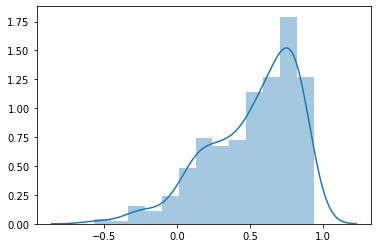

In [41]:
sns.distplot(for_graph_high)

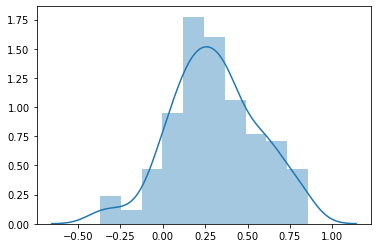

In [42]:
sns.distplot(for_graph_low)

In [44]:
len(for_graph_high)

396

In [53]:
final_high_expression = ['NID1',
 'SERPINB1','HSPA6','TPT1','NDUFV1','CNN3','LAMB2','RCN1','PHGDH','NDUFS1','FAHD1',
 'EIF1','RSU1','CTD-2550O8.5','DUSP3','ARPC1B','CCT6A','ACAA1','CCT7','ALDH1B1',
 'NDRG1','ACTA2','VPS29','RPL15','RPLP1','S100A12','CCT4','CHCHD3','MARCKS','MYL5',
 'AMBP','CALML3','PSMB2','LRG1','HIBADH','PLIN1','SLC9A3R1','SULT1A1','RPS17','SAMHD1',
 'IGLV3-25','CKAP4','STMN1','ANXA3','ST13','COX17','FLNC','SOD3','SRP9','PTGES3','ACOT13',
 'COL1A2','FKBP3','IGKV3-11','ACADM','PA2G4','BCAP31','TCEB1','CST2','SRSF7','ARG1',
 'RAB2A',
 'CLIC4',
 'MAPRE1',
 'LRRC59',
 'IGHG4',
 'CNPY2',
 'AL021546.6',
 'SNCG',
 'CH17-60O17.7',
 'PIP',
 'TPPP3',
 'EMILIN1',
 'AC233755.1',
 'CST3',
 'CAPG',
 'APOL6',
 'ALDH7A1',
 'PHPT1',
 'NAMPT',
 'RAB14',
 'GLO1',
 'TMED10',
 'SEPT7',
 'F13A1',
 'GPX1',
 'SRI',
 'STIP1',
 'RPL14',
 'PEA15',
 'PCMT1',
 'CMBL',
 'PDHA1',
 'SEPT11',
 'NDUFC2',
 'LMNB2',
 'RBMX',
 'NCL',
 'EEF1G',
 'LAMC1',
 'MFAP2',
 'PPP2R1A',
 'AMY2A',
 'YWHAH',
 'RPL10A',
 'HDGF',
 'SFN',
 'SNCA',
#  'APOC3',
 'THY1',
 'SNRPD3',
 'F2',
 'RPS7',
 'CPA1',
 'DYNLRB1',
 'RPL13',
 'SRSF1',
 'EHD1',
 'GLRX',
 'MYL12A',
 'REG1A',
 'AK4',
 'ADIRF',
 'HINT2',
 'CFH',
 'MANF',
 'FABP2',
 'NDUFB10',
 'PTGR1',
 'EZR',
 'CCT8',
 'LTF',
 'MGST3',
 'HMGB2',
 'APOE',
 'ILK',
 'MAOA',
 'ALDH9A1',
 'PSMA6',
 'CD9',
 'NDUFA13',
 'TCP1',
 'AIFM1',
 'CST4',
 'NDUFS5',
 'RPN1',
 'NANS',
 'GLOD4',
 'CMPK1',
 'ABHD14B',
 'ASPN',
 'TUBB',
 'RPL9',
 'NDUFAB1',
 'COMT',
 'XRCC6',
 'GOT1',
 'METTL7A',
 'SRSF3',
 'UQCRH',
 'KRT13',
 'HNRNPU',
 'HSPG2',
 'RPL22',
 'BHMT',
 'CCT3',
 'COX7C',
 'GNG12',
 'PTMS',
 'APRT',
 'SERPING1',
 'ATP5D',
 'ALDOC',
 'CCT5',
 'CCT2',
 'CYC1',
 'TUBB2B',
 'AK3',
 'PRPS2',
 'FKBP2',
 'TNNC1',
 'KLK3',
 'RPS27L',
 'JCHAIN',
 'SUCLG2',
 'LAP3',
 'FH',
 'NDUFA6',
 'UCHL1',
 'CAPZA2',
 'PSMB1',
 'GPX3',
 'HMGCS2',
 'RPS25',
 'CSRP3',
 'PYGB',
 'DDAH1',
 'TST',
 'ACTR3',
 'PRH1',
 'CH507-9B2.4',
 'RPL27A',
 'RHOA',
 'PSMA5',
 'RPL5',
 'RPS28',
 'NDUFA8',
 'PSME2',
 'SDHA',
 'AKR1B10',
 'IGKV3-20',
 'MYBPC3',
 'S100A13',
 'VTN',
 'PCK2',
 'NDUFS6',
 'RPL6',
 'DYNLL2',
 'H2AFV',
 'RAB7A',
 'APOH',
 'SUMO2',
 'KRT20',
 'KRT10',
 'LASP1',
 'SUB1',
 'SNRPD1',
 'RPL11',
 'IGKV1D-33',
 'VDAC2',
 'PDHB',
 'SEPT2',
 'RPL12',
 'FBN1',
 'ASS1',
 'COL14A1',
 'COL1A1',
 'RAB1B',
 'YWHAG',
 'ESD',
 'RAB11B',
 'COX7A2',
 'RPL38',
 'PPA1',
 'GATM',
 'DECR1',
 'AHCY',
 'SERPINH1',
 'USMG5',
 'GSTK1',
 'TXNDC5',
 'KRT1',
 'RBP2',
 'AKR1C1',
 'ARPC4',
 'GSTM3',
 'LPP',
 'PCBP1',
 'KRT6C',
 'GRHPR',
 'CPS1',
 'PSMA7',
 'RPS15A',
 'ATP5I',
 'RNH1',
 'RPS11',
 'RPL30',
 'AK2',
 'BASP1',
 'PGM5',
 'NUTF2',
 'RPS27',
 'CD59',
 'AHNAK',
 'ATP5L',
 'HSP90AB1',
 'RPS19',
 'PGM1',
 'TLN1',
 'ALDH6A1',
 'PDLIM1',
 'CISD1',
 'SAA2',
 'UQCRC1',
 'SERPINC1',
 'S100A8',
 'RPS8',
 'RAP1A',
 'HIST1H2AC',
#  'RPL17-C18orf32',
 'GPD1',
 'CKMT2',
 'ADH4',
 'UQCRC2',
 'COX6B1',
 'RPS4X',
 'WDR1',
 'AKR1A1',
 'LCP1',
 'MT-CO2',
#  'APCS',
 'CRIP1',
 'RPL23A',
 'MTPN',
 'HIST1H1B',
 'CLIC1',
 'IGKV2D-28',
 'CRIP2',
 'RPL7',
 'ARPC2',
 'NDUFA4',
 'CRYZ',
 'S100A1',
 'DPYSL2',
 'COTL1',
 'ATP5O',
 'CKM',
 'COX5A',
 'PDIA4',
 'RPS18',
 'PHB2',
 'PDIA6',
 'ATP5F1',
 'ATOX1',
 'ORM2',
 'UBE2L3',
 'AZGP1',
 'RPS27A',
 'TPSB2',
 'DPYSL3',
 'ADH5',
 'ATP5J',
 'SLC25A4',
 'FBP1',
 'HSPA9',
 'SOD1',
 'PTRF',
 'AK1',
 'AGR2',
 'HSD17B10',
 'PTMA',
 'TTR',
 'VCP',
 'TNNI3',
 'EEF2',
 'TALDO1',
 'KRT5',
 'S100P',
 'TBCA',
 'SH3BGRL',
 'CTSB',
 'RPS12',
 'AKR1B1',
 'CYB5R3',
 'KRT7',
 'EPHX1',
 'RPS14',
 'AHSG',
 'ETFA',
 'HADH',
 'GOT2',
 'A2M',
 'PHB',
 'RAN',
 'ARHGDIA',
 'HADHA',
 'TAGLN2',
 'DDT',
 'VDAC1',
 'GPI',
 'TKT',
 'ECHS1',
 'TGM2',
 'S100A9',
 'BANF1',
 'FKBP1A',
 'UBE2N',
 'COX6C',
 'SLC25A5',
 'CAT',
 'IDH1',
 'RPS21',
 'ACO2',
 'HNRNPA1',
 'IGHV3-72',
 'ATP5H',
 'KRT14',
 'HADHB',
 'ETFB',
 'CTSD',
#  'APOA4',
 'BGN',
 'S100A4',
#  'NME1-NME2',
 'RPS20',
 'LYZ',
 'RPS9',
 'ANXA4',
 'TUFM',
 'LGALS3',
 'PSME1',
 'APOC1',
 'ALDOB',
 'RPS16',
 'CBR1',
 'GSTA1',
 'APOA2',
 'MSN',
 'GLUD1',
 'COX4I1',
 'MYH9',
 'PRELP',
 'PRDX3',
 'DSTN',
 'CYCS',
 'PRDX5',
 'KRT18',
 'GSTP1',
 'ARF1',
 'RPLP2',
 'SOD2',
 'MIF',
 'S100A11',
 'COX5B',
 'IDH2',
 'HINT1',
 'HSP90B1',
 'COL6A1',
 'HSPA1B',
 'HMGB1',
 'S100A10',
 'PGAM1',
 'HSP90AA1',
 'MYL6B',
 'HPX',
 'BLVRB',
 'CA2',
 'ANXA1',
 'HSPB6',
 'EIF5A',
 'FABP3',
 'HSPA5',
 'HSPE1',
 'TXN',
 'OGN',
 'LDHB',
 'HNRNPA2B1',
 'HSPD1',
 'IGHG2',
 'IGHA1',
 'CYB5A',
 'PRDX6',
 'MDH2',
 'PARK7',
 'CSTB',
 'HIST2H3PS2',
 'FABP4',
 'TMSB10',
 'ORM1',
 'ANXA5',
 'TPI1',
 'CSRP1',
 'MYH7',
 'YWHAE',
 'LUM',
 'ADH1B',
 'S100A6',
 'FGA',
 'ENO1',
 'KRT8',
 'FABP1',
 'HIST1H1E',
 'MYL2',
 'PEBP1',
 'PGK1',
 'PPIB',
 'DEFA1',
 'PRDX2',
 'HIST2H2AA3',
 'TUBB4B',
 'DBI',
 'HSPB1',
 'LGALS1',
 'TUBA1A',
 'H3F3B',
 'PFN1',
 'CALM2',
 'MYL3',
 'FGB',
 'PRDX1',
 'DES',
 'IGLC2',
 'APOA1',
 'IGKC',
 'ACTC1',
 'HIST2H2BF',
 'VIM',
 'TAGLN',
 'HIST1H4H',
 'TMSB4X']

In [46]:
#Omit from high_expression
#  'APOA4',
#  'NME1-NME2',
# 'APOC3',
#  'RPL17-C18orf32',
#  'APCS',

In [47]:
final_low_expression = ['CTD-2545M3.6', 'CLSPN', 'E2F2', 'NTSR2', 'TNFSF13B', 'ATMIN', 'WDR88', 'ATG16L2', 'SCNN1G', 'TMEM158', 'REM2', 'NEUROD2', 'JRK', 'NEK10', 'SLC41A1', 'STPG1', 'GPR162', 'CENPI', 'PLEKHB2', 'NKPD1', 'RGR', 'GFI1B', 'NKX3-2', 'TGDS', 'TMEM145', 'OBP2A', 'KCNQ3', 'BTBD3', 'SPATA16', 'ATP6V0C', 'PALB2', 'HOXC5', 'TRAV23DV6', 'LRTM2', 'MLNR', 'ZNF195', 'RGPD5', 'FASTK', 'BCL2L12', 'HTR1B', 'NYAP2', 'ZNF26', 'HIPK3', 'RHAG', 'NHLRC4', 'PLPP5', 'PRELID3A', 'NTRK1', 'ADGRF4', 'HJURP', 'EFNA2', 'FAM19A1', 'TBC1D32', 'FCRL2', 'EXOC3L1', 'ADRA1B', 'PLAGL2', 'VWC2', 'FRRS1', 'SNAI2', 'LCE2B', 'RBMY1F', 'IL1F10', 'CCNA1', 'COL9A3', 'ZBTB41', 'BMPR1B', 'SPINK2', 'C20orf196', 'PYGO1', 'ZNF18', 'ZNF25', 'SP8', 'ZCCHC2', 'DONSON', 'PCDHA10', 'SLC6A7', 'ZSCAN30', 'HMP19', 'RNF187', 'ERCC6-PGBD3', 'TET3', 'IER2', 'FANCA', 'IL22RA1', 'KLF1', 'TBX4', 'CRYGS', 'FAM53C', 'FUZ', 'ATXN7L3', 'C19orf44', 'AIM2', 'GMCL1', 'DISP1', 'HOXD9', 'BUB1', 'ADAM30', 'BIRC3', 'GGN', 'TRBV6-5', 'ZNF805', 'RASGEF1A', 'ADGRD1', 'ZNF711', 'GJB6', 'TMEM132D', 'PRDM4', 'GRHL3', 'C3orf62', 'GPR62', 'PCDHB16', 'SUV420H1', 'LDLRAD4', 'ZMYM6', 'CALY', 'MYBL2', 'FSIP1', 'PLEKHM3', 'CES4A', 'ADRB2', 'TP53INP2', 'ONECUT2', 'MBD6', 'NEK11', 'CTC-260F20.3', 'LRP5', 'ZXDB', 'PCED1B', 'EBF3', 'KRT28', 'MEIG1', 'BTBD10', 'FBXO27', 'APEX2', 'BRICD5', 'SMCP', 'SEMA5A', 'NLGN4X', 'ZNF679', 'ZNF354B', 'NIPAL4', 'GLYATL1P3', 'LRP6', 'TGM5', 'KLF2', 'CECR2', 'GPANK1', 'FAM83A', 'TMEM31', 'ULK2', 'JAG2', 'CTC1', 'SLC8A3', 'ZNF264', 'STYK1', 'LRRC43', 'SCAND1', 'KREMEN1', 'ZSCAN25', 'TMEM254', 'MT1X', 'ULK4', 'HMGCLL1', 'KCNJ9', 'SAMD10', 'SLC16A12', 'DOLK', 'SLC45A3', 'FAM163B', 'CDT1', 'C18orf21', 'TMEM200B', 'THRB', 'CERK', 'DEAF1', 'ADRA2B', 'WDPCP', 'LY86', 'EYA1', 'SLX1A', 'NOXO1', 'SPAG16', 'NIPAL3', 'FAM178B', 'MYOCD', 'BARD1', 'ZNF154', 'IL27RA', 'CRHR1', 'FBRS', 'LOR', 'LTB', 'RANBP17', 'SLC25A34', 'MYBL1', 'TP53I13', 'GALNT13', 'KLHL3', 'S100PBP', 'TP73', 'LGALS14', 'ABCC8', 'TIPIN', 'HIF1A', 'HOXD11', 'FAM205A', 'TUBA3E', 'CXCR5', 'SFMBT2', 'SORCS3', 'IGHV3-21', 'GRIN2A', 'C16orf54', 'SLC10A7', 'RNF8', 'ZMYM1', 'SCN3A', 'MUC20', 'KRBA1', 'C5orf47', 'KLHL8', 'PCDHGC5', 'SLC2A11', 'ANKH', 'JARID2', 'TRABD2B', 'MUS81', 'EOMES', 'TMEM14B', 'FBXO15', 'GAB3', 'IGKV1D-8', 'ADAMTS15', 'SEPT12', 'C15orf65', 'KRTAP19-5', 'HOXC6', 'PAPL', 'WDR49', 'KIAA0232', 'KNSTRN', 'SYCE2', 'FBXO46', 'RGS13', 'NR5A2', 'SLC28A2', 'KCNIP1', 'OTUD7A', 'SPSB1', 'SLC15A3', 'ZNF521', 'SMAD6', 'MR1', 'ARMC2', 'WISP1', 'SREK1IP1', 'RUSC2', 'ZNF189', 'CYP27B1', 'ZNF737', 'LRRC3', 'CMKLR1', 'ZNF263', 'ZNF627', 'TCTN1', 'COL23A1', 'ANKRD7', 'FCRL4', 'CALM1', 'ZNF615', 'PLA2G4D', 'HCN4', 'LANCL3', 'C5orf28', 'DACT3', 'ACKR2', 'CCDC64', 'MORN4', 'CDC20', 'NICN1', 'HIST1H2BC', 'ACKR3', 'C10orf88', 'C1QTNF4', 'ENDOV', 'MOSPD3', 'SLC4A5', 'FAM104A', 'SMTNL2', 'TBX20', 'IRS4', 'RP11-77K12.1', 'GLI1', 'JPH4', 'RBMXL3', 'PNMA3', 'ZNF277', 'CDH8', 'TNFSF12', 'SUV420H2', 'MFSD12', 'SPRR2D', 'LGI2', 'NCKAP5', 'HHAT', 'TPRG1', 'TMEM42', 'CAMK1G', 'SLFN14', 'SALL1', 'EPAS1', 'TLL2', 'ZNF14', 'TLX1', 'TDRD5', 'SLC35G2', 'DCAF17', 'C7orf61', 'ZBTB17', 'NR4A1', 'HHIPL1', 'ZDHHC9', 'ZNF236', 'ZNF581', 'GNAT3', 'CCND1', 'GSG2', 'ASB10', 'PCDH12', 'GPR137B', 'ORC1', 'CXCR4', 'CSF2RB', 'LRFN4', 'EMCN', 'PIGA', 'DNASE1L2', 'DACT2', 'FAM219A', 'TAF1B', 'EGFL8', 'FOXA3', 'P2RX2', 'FCMR', 'BATF', 'FGFRL1', 'USP45', 'MEF2A', 'FNIP2', 'REXO1', 'DDN', 'IRF1', 'UTY', 'PROSER3', 'RSPH6A', 'GTSE1', 'BRINP2', 'RGS1', 'ZNF260', 'TMEM19', 'VWA7', 'MUC16', 'SUSD4', 'CDCA7', 'SAMD11', 'TET2', 'MMS22L', 'TMEM200A', 'IFNAR2', 'ZNF34', 'CENPO', 'CACNA1H', 'TIGIT', 'TTF1', 'C1QTNF1', 'BMP2', 'MCM8', 'LDLRAD3', 'WRB', 'FAM219B', 'UPK3A', 'ORAI3', 'ESRRB', 'BAHD1', 'PKNOX2', 'LY6D', 'LRFN5', 'SHISA6', 'AATK', 'C1orf112', 'CENPM', 'BARX1', 'BOC', 'CEACAM3', 'NBPF9', 'SPRR2F', 'PER2', 'LHX2', 'KCNIP2', 'FAM170A', 'GLIPR1L2', 'GPR39', 'PNLDC1', 'XKR7', 'PLAG1', 'GK5', 'APCDD1', 'TNFSF4', 'PRR5L', 'NTNG2', 'KRTCAP2', 'RP11-507M3.1', 'NEK5', 'HYPM', 'MYLK2', 'WNK4', 'CBFA2T3', 'NR3C2', 'CCKAR', 'CCDC155', 'GLTSCR1L', 'ARRDC3', 'MATK', 'KCNK3', 'RP11-426L16.10', 'CHRM3', 'UPK3BL', 'C3orf18', 'ABHD17A', 'ESRRG', 'ZNF667', 'CHRM4', 'NEK2', 'CLIP4', 'IDS', 'ZBTB16', 'ATXN7', 'CXorf67', 'HIST1H2BK', 'TESK1', 'RSG1', 'TMEM208', 'CCDC74B', 'SPESP1', 'PPP1R15B', 'CRB2', 'UGT2B28', 'P2RY2', 'GALNT15', 'DTWD1', 'SIGLEC12', 'SLC16A9', 'PROSER1', 'TRIM8', 'TMEM248', 'C7orf60', 'SLC35C2', 'MEIOB', 'MTF1', 'ZBTB25', 'SAMD14', 'TCTEX1D1', 'CITED2', 'SLC19A1', 'DMRT3', 'SYT15', 'ADCY1', 'NTNG1', 'PCGF3', 'ANGPTL7', 'DCLRE1C', 'SEPN1', 'FOXI3', 'MAP3K10', 'DNAJC22', 'CREB5', 'PAK6', 'ZNF367', 'TTLL6', 'PHF13', 'FBXW4', 'ZNF358', 'HIST1H2BM', 'DUSP18', 'E2F5', 'KCNJ1', 'C22orf15', 'FOXP2', 'C15orf61', 'TMEM106C', 'DGKD', 'ARL14', 'C1orf210', 'RP11-330H6.5', 'KCNQ5', 'PIANP', 'CREB3L1', 'FBXW7', 'RAD51AP1']

In [54]:
luad_high_expression = correlation_list(luad,final_high_expression)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [55]:
luad_low_expression = correlation_list(luad, final_low_expression)

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (/Users/benkk/anaconda3/envs/cptac_dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [56]:
luad_high_expression = luad_high_expression[0]
luad_low_expression = luad_low_expression[0]

In [57]:
for_graph_high_expression = ret_list(luad_high_expression)
for_graph_low_expression = ret_list(luad_low_expression)

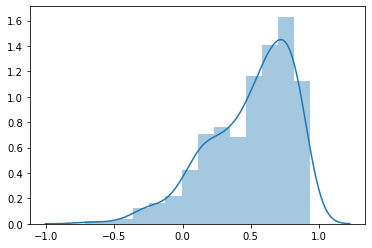

In [58]:
sns.distplot(for_graph_high_expression)
#Update and add heading to outline

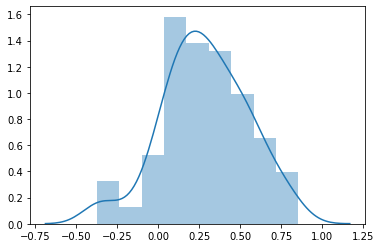

In [59]:
sns.distplot(for_graph_low_expression)